In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as k

# Remove ties from metadata and remove ties from instances

In [8]:
#function to read the files in a directory to determine what the max coords are across the entire dataset

def get_max_coords(directory):
  
    all_x =0
    all_y =0
    
    for filename in os.listdir(directory):
        coords=[]
      
        instance = os.path.join(directory, filename)
        with open(instance) as f:
            line = f.readline()
            while line:
                line = f.readline()
                x= [int(s) for s in line.split() if s.isdigit()]
                if len(x)==2:
                    coords.append(x)
                
        df = pd.DataFrame (coords, columns = ['x', 'y'])
        max_x = np.max(df['x'])
        max_y = np.max(df['y'])
       
        if max_x > all_x:
            all_x=max_x
        if max_y > all_y:
            all_y=max_y
    return all_x,all_y

In [9]:
directory = 'All-6Set/Combo'
all_x,all_y = get_max_coords(directory)
print(all_x,all_y)

9999304 100099998


10007961 138
this is x 10005093
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    int64  
 1   y       200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


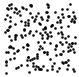

In [6]:
#function that creates an image from one instance
import math

instance = 'All-6Set/Expknap/0_knapPI_9_200_100000_1_new'

coords=[]
coords2 = []
with open(instance) as f:
    line = f.readline()
    while line:
        line = f.readline()
        x=[int(s) for s in line.split() if s.isdigit()]
        if len(x)== 1:
            #print(x[0], math.log(x[0]))
            #temp = math.log(x[0])
            temp = x[0]
            temp2 = 1000
            x[0] = 0
            x.append(temp)
            coords.append(x)
        elif len(x) == 2:
            coords.append(x)
            coords2.append(x)
#print(coords2)           
max_val= (max(max(coords)))
min_val = (min(min(coords2)))

x = coords[0][1]
value = ((x-min_val)/(max_val-min_val))+(max_val-min_val)
coords[0].remove(x)
coords[0].append(value)
df = pd.DataFrame (coords, columns = ['x', 'y'])
df.info()
figure(figsize=(10, 10), dpi=10)
plt.scatter(df['x'],df['y'],s=300, color = 'black')
plt.axis('off')
plt.savefig('testIMG2.jpg', dpi=10)

In [26]:
# HELPER FUNCTION

#this function is passed a folder name and  creates an image  for every instance in the folder and saves them as a jpg with the 
#size and resolution

def save_instance_images(directory,mydpi):

    for filename in os.listdir(directory):
        
        instance = os.path.join(directory, filename)    
        instance_name = filename
        coords= []
        coords2 = []
        with open(instance) as f:
            line = f.readline()
            while line:
                line = f.readline()
                x=[int(s) for s in line.split() if s.isdigit()]
                if len(x)== 1:
                    #print(x[0], math.log(x[0]))
                    #temp = math.log(x[0])
                    temp = x[0]
                    x[0] = 0
                    x.append(temp)
                    coords.append(x)
                elif len(x) == 2:
                    coords.append(x)
                    coords2.append(x)
        #print(coords2)           
        max_val= (max(max(coords)))
        min_val = (min(min(coords2)))
        x = coords[0][1]
        #print(value/(max_val))
        #print((((x-min_val)*(x-min_val))/(max_val-min_val))+min_val)
        value = ((x-min_val)/(max_val-min_val))+(max_val-min_val)
        coords[0].remove(x)
        coords[0].append(value)
        df = pd.DataFrame (coords, columns = ['x', 'y'])
    
        # setting the size of the figure and the dpi determines how many pixels
        figure(figsize=(4, 4), dpi=mydpi)    

        plt.scatter(df['x'],df['y'],s = 50)
        plt.axis('off')
        instance_img = 'All-6Set\\EXPImages\\'+instance_name+'.jpg'
        plt.savefig(instance_img, dpi=mydpi)
        
    return 'done'

In [ ]:
dpi = 8
directory = 'All-6Set/Expknap'
save_instance_images(directory, dpi)

<ipython-input-26-b01ba6f5c5be>:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(4, 4), dpi=mydpi)


'done'